<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/object_detection_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
import time
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
!wget https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/float16/latest/efficientdet_lite0.tflite

--2024-08-11 16:11:17--  https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/float16/latest/efficientdet_lite0.tflite
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7254339 (6.9M) [application/octet-stream]
Saving to: ‘efficientdet_lite0.tflite’

efficientdet_lite0. 100%[===================>]   6.92M  --.-KB/s    in 0.08s   

2024-08-11 16:11:17 (89.4 MB/s) - ‘efficientdet_lite0.tflite’ saved [7254339/7254339]



In [ ]:
model_path = "/content/efficientdet_lite0.tflite"

In [ ]:
# Load the input image from an image file.
mp_image = mp.Image.create_from_file('/content/dog.jpg')

In [ ]:
import mediapipe as mp

#Base options for external assets
BaseOptions = mp.tasks.BaseOptions
ObjectDetector = mp.tasks.vision.ObjectDetector
ObjectDetectorOptions = mp.tasks.vision.ObjectDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = ObjectDetectorOptions(
    base_options=mp.tasks.BaseOptions(model_asset_path=model_path),
    max_results=5,
    running_mode=VisionRunningMode.IMAGE ,
    score_threshold = 0.5)

with ObjectDetector.create_from_options(options) as detector:
  start = time.time()
  detection_result = detector.detect(mp_image)
  print(time.time() - start)

0.18018078804016113


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
detection_result

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=123, origin_y=126, width=450, height=301), categories=[Category(index=None, score=0.6530164480209351, display_name=None, category_name='bicycle')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=466, origin_y=78, width=222, height=93), categories=[Category(index=None, score=0.6311410665512085, display_name=None, category_name='car')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=128, origin_y=220, width=190, height=330), categories=[Category(index=None, score=0.6006255149841309, display_name=None, category_name='dog')], keypoints=[])])

In [ ]:
dir(detection_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_from_pb2',
 'detections',
 'to_pb2']

In [ ]:
detection_result.detections

[Detection(bounding_box=BoundingBox(origin_x=123, origin_y=126, width=450, height=301), categories=[Category(index=None, score=0.6530164480209351, display_name=None, category_name='bicycle')], keypoints=[]),
 Detection(bounding_box=BoundingBox(origin_x=466, origin_y=78, width=222, height=93), categories=[Category(index=None, score=0.6311410665512085, display_name=None, category_name='car')], keypoints=[]),
 Detection(bounding_box=BoundingBox(origin_x=128, origin_y=220, width=190, height=330), categories=[Category(index=None, score=0.6006255149841309, display_name=None, category_name='dog')], keypoints=[])]

In [ ]:
type(detection_result.detections)

list

In [ ]:
len(detection_result.detections)

3

In [ ]:
for data in detection_result.detections:
  print(data)
  print("\n")

Detection(bounding_box=BoundingBox(origin_x=123, origin_y=126, width=450, height=301), categories=[Category(index=None, score=0.6530164480209351, display_name=None, category_name='bicycle')], keypoints=[])


Detection(bounding_box=BoundingBox(origin_x=466, origin_y=78, width=222, height=93), categories=[Category(index=None, score=0.6311410665512085, display_name=None, category_name='car')], keypoints=[])


Detection(bounding_box=BoundingBox(origin_x=128, origin_y=220, width=190, height=330), categories=[Category(index=None, score=0.6006255149841309, display_name=None, category_name='dog')], keypoints=[])




In [ ]:
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

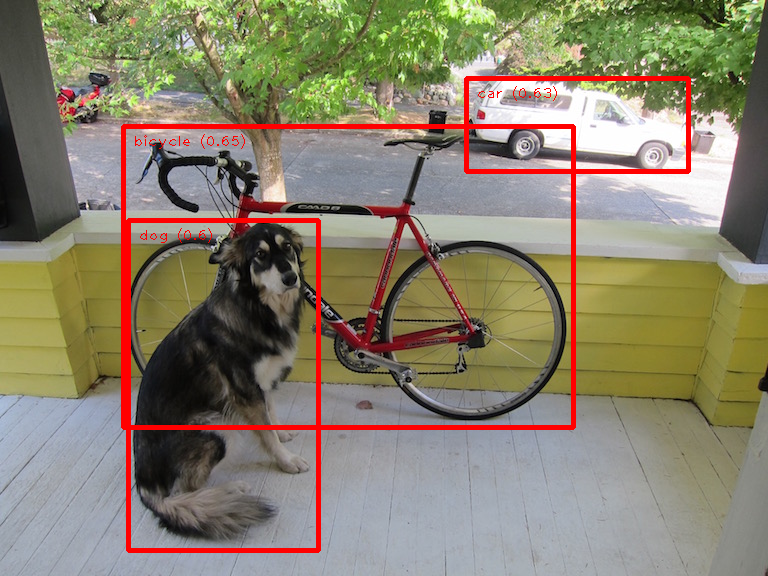

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_copy = np.copy(mp_image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)